In [1]:
import numpy as np
import sklearn as skl
import functions as fx
import matplotlib.pyplot as plt
import sklearn.model_selection as sklm

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

In [2]:
n               = 20
x               = np.sort(np.random.uniform(0, 1, n))
y               = np.sort(np.random.uniform(0, 1, n))
noise_level     = 1

design_matrix   = fx.DesignDesign(x,y,5)
x_m, y_m        = np.meshgrid(x,y)
franke          = fx.FrankeFunction(x_m, y_m, noise_level)

#### Plot Franke Function

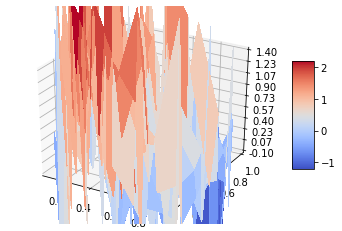

In [3]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
surf        = ax.plot_surface(x_m, y_m, franke, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Ordinary Least Squares

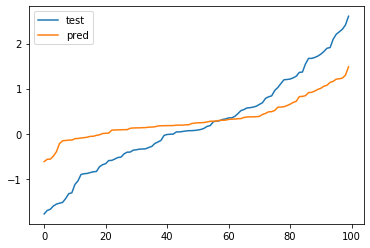

In [4]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design_matrix,np.ravel(franke))

beta_ols, frank_pred = fx.OridinaryLeastSquares(x_train,frank_train, x_test)

frank_pred.shape

#print(x_train.shape)

pred = frank_pred.reshape((int(len(frank_pred)/n),n))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()


In [5]:



r2, mse, r2_in, mse_in = fx.k_fold_cv(7, frank_test, x_test, fx.OridinaryLeastSquares, shuffle=True)

print(r2)
print(mse)

ValueError: too many values to unpack (expected 4)

In [3]:

n               = 100
x               = np.linspace(0, 1, n)
y               = np.linspace(0, 1, n)
noise_level     = 0.1

x_m, y_m        = np.meshgrid(x,y)
franke          = np.ravel(fx.FrankeFunction(x_m, y_m, noise_level))


In [4]:

maxpower = 13
r2=np.zeros(maxpower)
r2_in=np.zeros(maxpower)
mse=np.zeros(maxpower)
mse_in=np.zeros(maxpower)
bias =np.zeros(maxpower)
variance=np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2[i], mse[i], r2_in[i], mse_in[i], bias[i], variance[i] = fx.k_fold_cv(7, franke, design_matrix, fx.RidgeRegression,10e-05, shuffle=True)

    print((i+1)*100/maxpower)
    
    

7.6923076923076925
15.384615384615385
23.076923076923077
30.76923076923077
38.46153846153846
46.15384615384615
53.84615384615385
61.53846153846154
69.23076923076923
76.92307692307692
84.61538461538461
92.3076923076923
100.0


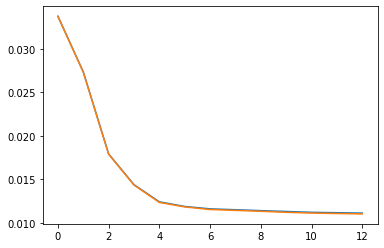

In [5]:
plt.plot(range(maxpower),mse)
plt.plot(range(maxpower),mse_in)
plt.show()


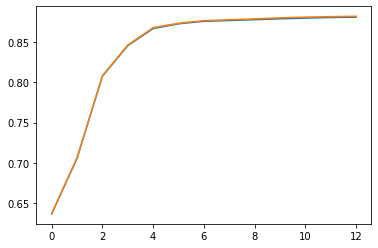

In [6]:
plt.plot(range(maxpower),r2)
plt.plot(range(maxpower),r2_in)
plt.show()


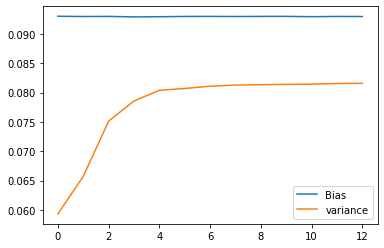

In [10]:
plt.plot(range(maxpower),(bias), label='Bias')
plt.plot(range(maxpower),variance, label='variance')
plt.legend()
plt.show()

--- (0) Generating the 2D Franke Function ---


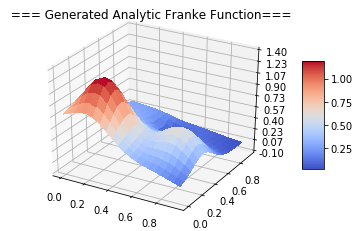

--- (1) Fitting the 2D Franke Function, use all data points with selected order ---


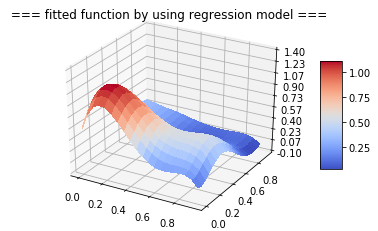

--- (2) Fitting the 2D Franke Function, use resample for training and validation ---
------------- start running kfold: 0 of total folds: 10--------------
------------- start running kfold: 1 of total folds: 10--------------
------------- start running kfold: 2 of total folds: 10--------------
------------- start running kfold: 3 of total folds: 10--------------
------------- start running kfold: 4 of total folds: 10--------------
------------- start running kfold: 5 of total folds: 10--------------
------------- start running kfold: 6 of total folds: 10--------------
------------- start running kfold: 7 of total folds: 10--------------
------------- start running kfold: 8 of total folds: 10--------------
------------- start running kfold: 9 of total folds: 10--------------
------------- start running kfold: 0 of total folds: 10--------------
------------- start running kfold: 1 of total folds: 10--------------
------------- start running kfold: 2 of total folds: 10--------------
-----

------------- start running kfold: 2 of total folds: 10--------------
------------- start running kfold: 3 of total folds: 10--------------
------------- start running kfold: 4 of total folds: 10--------------
------------- start running kfold: 5 of total folds: 10--------------
------------- start running kfold: 6 of total folds: 10--------------
------------- start running kfold: 7 of total folds: 10--------------
------------- start running kfold: 8 of total folds: 10--------------
------------- start running kfold: 9 of total folds: 10--------------
------------- start running kfold: 0 of total folds: 10--------------
------------- start running kfold: 1 of total folds: 10--------------
------------- start running kfold: 2 of total folds: 10--------------
------------- start running kfold: 3 of total folds: 10--------------
------------- start running kfold: 4 of total folds: 10--------------
------------- start running kfold: 5 of total folds: 10--------------
------------- start 

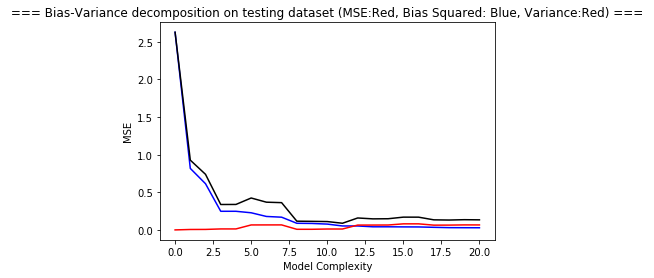

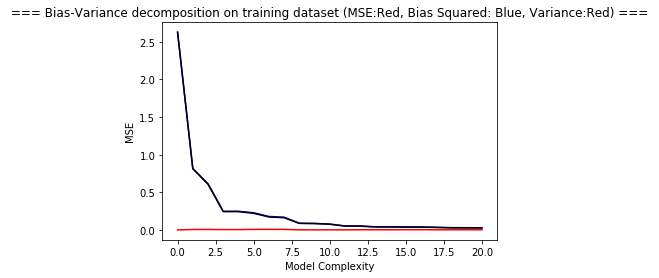

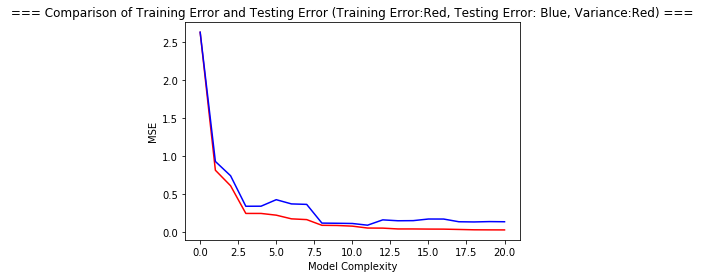

In [9]:
# -*- coding: utf-8 -*-

"""

Created on Thu Sep 13 00:21:59 2018



@author: haozh

"""



from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np

from random import random, seed





# ================ (Step: 0) generating the Franke Function =========================================================



print('--- (0) Generating the 2D Franke Function ---')



fig = plt.figure()

ax = fig.gca(projection='3d')



# Make data.

x = np.arange(0, 1, 0.05)

y = np.arange(0, 1, 0.05)

x, y = np.meshgrid(x,y)





def FrankeFunction(x,y):

    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))

    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))

    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))

    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)

    return term1 + term2 + term3 + term4





z = FrankeFunction(x, y)



# Plot the surface.

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,

                       linewidth=0, antialiased=False)



# Customize the z axis.

ax.set_zlim(-0.10, 1.40)

ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title(' === Generated Analytic Franke Function=== ')



# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)



plt.show()





# ================ (Step: 1) Fitting the 2D Franke Function, use all data points with selected order ===================

print('--- (1) Fitting the 2D Franke Function, use all data points with selected order ---')



# create 1-d vector for x, y and z

x_vec = x.reshape(x.size,1) 

y_vec = y.reshape(y.size,1)

z_vec = z.reshape(z.size,1)



# generate the design matrix 



def design_matrix_set(x=x_vec,y=y_vec,BaseNumber=21):

    

    # define the design matrix up to 5th order of multivariables x and y (21 bases in total) 

    A_matrix_full = np.c_[np.ones(x.shape), x, y, x**2, y**2, x*y, x**3, y**3, x**2*y, x*y**2, x**4, y**4, x**3*y, x**2*y**2, x*y**3, x**5, y**5, x**4*y, x**3*y**2, x**2*y**3, x*y**4]            



    # select the number of bases for output

    A_matrix = A_matrix_full[:,:BaseNumber]

    

    return A_matrix

        

            

# derive model parameters Beta

array_A = design_matrix_set(x_vec,y_vec,BaseNumber=21)

beta    = np.linalg.inv(array_A.T.dot(array_A)).dot(array_A.T).dot(z_vec)



# generate the predicted z values based on derived model

zpredict = array_A.dot(beta)

zpredict = zpredict.reshape(z.shape)



# plot the derived prediction

fig = plt.figure()

ax  = fig.gca(projection='3d')



# Plot the surface.

surf = ax.plot_surface(x, y, zpredict, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.

ax.set_zlim(-0.10, 1.40)

ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title(' === fitted function by using regression model === ')



# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)



plt.show()    



# ================ (Step: 2) Fitting the 2D Franke Function, using resample for training and validation================



print('--- (2) Fitting the 2D Franke Function, use resample for training and validation ---')



# function of fitting with k-fold cross validation

def k_fold_cross_validation(fold_n,BaseNumber=21,RandomShuffle=1,iteration_all=1,x=x_vec,y=y_vec,z=z_vec):

    

    assert(x.shape == y.shape),"The x and y vector has to be the same dimension"

    

    #generate index array

    ind_array = np.arange(len(x_vec))

    

    #random shuffle the index array

    if(RandomShuffle ==1):

        np.random.shuffle(ind_array)

    

    #number of elements per group

    fold_grp_elements =  int((len(ind_array) - np.remainder(len(ind_array),fold_n))/fold_n)

    

    # remove the index of the extra elements  

    extra_elements      = np.remainder(len(ind_array),fold_n)

    id_all_set          = np.delete(ind_array,np.arange(len(ind_array)-extra_elements, len(ind_array)))

    total_cv_elements   = int(len(id_all_set))

    

    # set the output list

    z_pred_all_cv     = np.zeros([fold_n,total_cv_elements])                           # 2d array to save the predicted Z in test dataset

    id_trainSet_cv    = np.zeros([fold_n,total_cv_elements-fold_grp_elements])         # 2d array to save the address ID of training dataset in each iteration

    id_testSet_cv     = np.zeros([fold_n,fold_grp_elements])                           # 2d array to save the address ID of test dataset in each iteration

    id_allSet_cv      = np.zeros([fold_n,total_cv_elements])                           # 2d array to save the address ID of all dataset in each iteration

    

    #convert the index array to int format(which is required in python for array indexing)

    id_trainSet_cv    = id_trainSet_cv.astype(int)

    id_testSet_cv     = id_testSet_cv.astype(int)

    id_allSet_cv      = id_allSet_cv.astype(int)

    

    # split the data into training and test dataset group

    for ifold in np.arange(fold_n):

        print('------------- start running kfold: ' + str(ifold) + ' of total folds: ' + str(fold_n) + '--------------')

        

        # split dataset into training and testing by maiepulating index

        id_test_set  =  id_all_set[ifold*fold_grp_elements:(ifold+1)*fold_grp_elements]

        id_train_set =  id_all_set;

        id_train_set =  np.delete(id_train_set,np.arange(ifold*fold_grp_elements,(ifold+1)*fold_grp_elements));

        

        #get x and y from training set

        train_set_x  = x[id_train_set]

        train_set_y  = y[id_train_set]

        train_set_z  = z[id_train_set]

        

        #apply the regression with training set and derive model parameters Beta

        array_A_train = design_matrix_set(train_set_x,train_set_y,BaseNumber)

        beta          = np.linalg.inv(array_A_train.T.dot(array_A_train)).dot(array_A_train.T).dot(train_set_z)

        

        # generate the predicted z values based on all dataset

        array_A_all    = design_matrix_set(x,y,BaseNumber)

        zpredict_all   = array_A_all.dot(beta)

        

        # save the train/test index and model predicted Z value for the future model evaluation use

        z_pred_all_cv[ifold,:]      = zpredict_all.T

        id_trainSet_cv[ifold,:]     = id_train_set

        id_testSet_cv[ifold,:]      = id_test_set

        id_allSet_cv[ifold,:]       = id_all_set

        

        # check if go through all the iterations or only one iteration

        if iteration_all == 0:

            print('--- only run one iteration in cross validatoin !! ---' )

            break 

        else:

            continue



        

    return z_pred_all_cv,id_trainSet_cv,id_testSet_cv,id_allSet_cv





# ----------- make the figure to display the bias and variance wrt model complexity ------------

#define the parameters

fold_n        = 10   # fold number

bases_max     = 21  # maximal bases number

RandomShuffle = 0   # choose if shuffle the data before CV

iteration_all = 1   # choose if run all iteration or just once in CV, or only run 1 iteratoin (0)



#define the MSE,Bias and Variance output of each complexity

MSE_testSet        = np.zeros([bases_max])

Bias_sqr_testSet   = np.zeros([bases_max])

Variance_testSet   = np.zeros([bases_max])

MSE_trainSet       = np.zeros([bases_max])

Bias_sqr_trainSet  = np.zeros([bases_max])

Variance_trainSet  = np.zeros([bases_max])



for i_BaseNumber in np.arange(bases_max):

    

    # apply fitting with k-fold validation

    z_pred_all_cv,id_trainSet_cv,id_testSet_cv,id_allSet_cv = k_fold_cross_validation(fold_n,i_BaseNumber,RandomShuffle,iteration_all,x_vec,y_vec,z_vec)

    

    # get the z prediction expectation (mean prediction)

    fx_predict_mean_allSet = np.mean(z_pred_all_cv,axis=0,keepdims=1)

    

    #pre-define the output values

    MSE_total_testset       = 0

    bias_sqr_total_testset  = 0

    variance_total_testset  = 0

    MSE_total_trainset      = 0

    bias_sqr_total_trainset = 0

    variance_total_trainset = 0

    

    # derive the MSE for every model with defined complexity based on test set

    for ikfold in np.arange(fold_n):

        

        # ============= (1) calculate the MSE, Bias^2 and Variance for testing set ==================

        #get the fx, fx_predict and fx_predict_mean (1D array output) for current kold iteration

        x_loc_test      = id_testSet_cv[ikfold,:]

        fx              = z_vec[x_loc_test]

        fx_predict      = z_pred_all_cv[ikfold,x_loc_test]  

        fx_predict_mean = fx_predict_mean_allSet.T[x_loc_test] 

        

        # make sure the variables has same dimension

        fx              = fx.reshape(len(x_loc_test),1)

        fx_predict      = fx_predict.reshape(len(x_loc_test),1)

        fx_predict_mean = fx_predict_mean.reshape(len(x_loc_test),1)

        

        # get the MSE, bias^2 and variance for current kfold iteration

        assert(fx.shape == fx_predict.shape),"The fx, fx_predict and fx_predict_mean vector has to be the same dimension"

        MSE      = np.mean((fx - fx_predict)**2) 

        bias_sqr = np.mean((fx - fx_predict_mean)**2)

        variance = np.mean((fx_predict - fx_predict_mean)**2)

        

        #derive the total MSE, total bias^2 and total Variance to represent the total cross-validation

        MSE_total_testset       = MSE_total_testset + MSE

        bias_sqr_total_testset  = bias_sqr_total_testset + bias_sqr

        variance_total_testset  = variance_total_testset + variance

        

        # ============= (2) calculate the MSE, Bias^2 and Variance for training set ==================

        # get the fx, fx_predict and fx_predict_mean (1D array output) for current kold iteration

        x_loc_train      = id_trainSet_cv[ikfold,:]

        fx              = z_vec[x_loc_train]

        fx_predict      = z_pred_all_cv[ikfold,x_loc_train]  

        fx_predict_mean = fx_predict_mean_allSet.T[x_loc_train] 

        

        # make sure the variables has same dimension

        fx              = fx.reshape(len(x_loc_train),1)

        fx_predict      = fx_predict.reshape(len(x_loc_train),1)

        fx_predict_mean = fx_predict_mean.reshape(len(x_loc_train),1)

        

        # get the MSE, bias^2 and variance for current kfold iteration

        assert(fx.shape == fx_predict.shape),"The fx, fx_predict and fx_predict_mean vector has to be the same dimension"

        MSE      = np.mean((fx - fx_predict)**2) 

        bias_sqr = np.mean((fx - fx_predict_mean)**2)

        variance = np.mean((fx_predict - fx_predict_mean)**2)

        

        #derive the total MSE, total bias^2 and total Variance to represent the total cross-validation

        MSE_total_trainset       = MSE_total_trainset + MSE

        bias_sqr_total_trainset  = bias_sqr_total_trainset + bias_sqr

        variance_total_trainset  = variance_total_trainset + variance

    

    # save the total MSE, Bias^2 and Variance for current model

    MSE_testSet[i_BaseNumber]        = MSE_total_testset

    Bias_sqr_testSet[i_BaseNumber]   = bias_sqr_total_testset

    Variance_testSet[i_BaseNumber]   = variance_total_testset

    MSE_trainSet[i_BaseNumber]       = MSE_total_trainset

    Bias_sqr_trainSet[i_BaseNumber]  = bias_sqr_total_trainset

    Variance_trainSet[i_BaseNumber]  = variance_total_trainset

    

        

#make the plot for Variance and Bias wrt model complexity

fig = plt.figure()

plt.plot(np.arange(bases_max),Bias_sqr_testSet,color='blue')

plt.plot(np.arange(bases_max),Variance_testSet,color='red')

plt.plot(np.arange(bases_max),MSE_testSet,color='black')

#plt.plot(np.arange(bases_max),Bias_sqr_testSet+Variance_testSet,color='green')



plt.title(' === Bias-Variance decomposition on testing dataset (MSE:Red, Bias Squared: Blue, Variance:Red) === ')

plt.xlabel('Model Complexity')

plt.ylabel('MSE')

plt.show()    



fig = plt.figure()

plt.plot(np.arange(bases_max),Bias_sqr_trainSet,color='blue')

plt.plot(np.arange(bases_max),Variance_trainSet,color='red')

plt.plot(np.arange(bases_max),MSE_trainSet,color='black')

#plt.plot(np.arange(bases_max),Bias_sqr_testSet+Variance_testSet,color='green')



plt.title(' === Bias-Variance decomposition on training dataset (MSE:Red, Bias Squared: Blue, Variance:Red) === ')

plt.xlabel('Model Complexity')

plt.ylabel('MSE')

plt.show()    



fig = plt.figure()

plt.plot(np.arange(bases_max),MSE_trainSet,color='red')

plt.plot(np.arange(bases_max),MSE_testSet,color='blue')

plt.title(' === Comparison of Training Error and Testing Error (Training Error:Red, Testing Error: Blue, Variance:Red) === ')

plt.xlabel('Model Complexity')

plt.ylabel('MSE')

plt.show()  